In [0]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving nyc-east-river-bicycle-counts.csv to nyc-east-river-bicycle-counts (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['nyc-east-river-bicycle-counts.csv']))
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


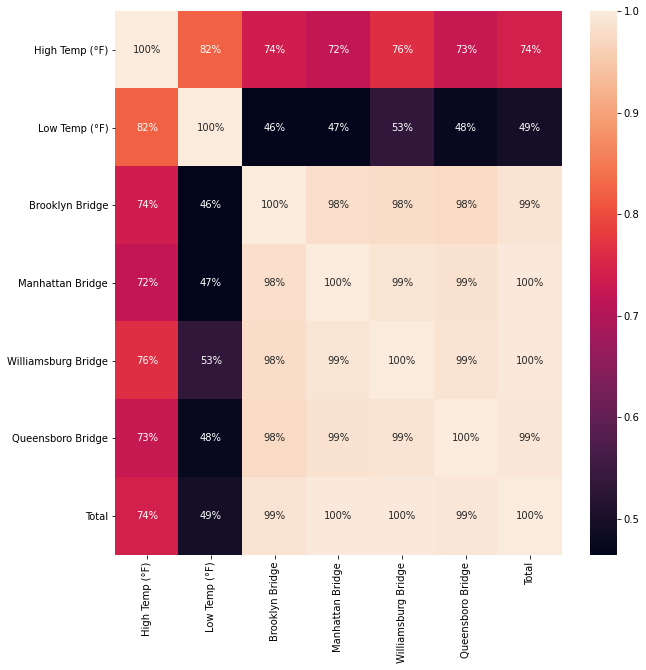

In [0]:
# To make it easier to read

plt.figure(figsize=(10,10)) # resizing the figure for better view
sns.heatmap(df.iloc[:,3:11].corr(), annot = True, fmt = '.0%')

0.552559857165008


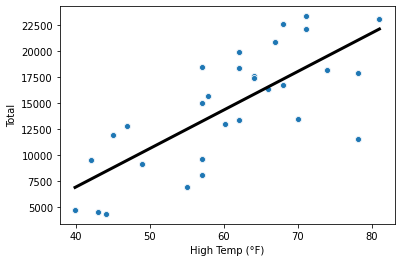

In [0]:
y = df['Total'].values.reshape(-1,1)
X = df['High Temp (°F)'].values.reshape(-1,1)

# Create the regressor:
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line

sns.scatterplot(data=df, x='High Temp (°F)', y='Total')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg, X, y, cv = 5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.50746976 0.53588702 0.5189416  0.58154375 0.51851483]
Average 5-Fold CV Score: 0.5324713931299657
